<a href="https://colab.research.google.com/github/Rakib-Ul-Haque/SecureK-NN/blob/master/SecureK_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **General K-NN with Manhattan Distance at 10K-fold for BCWD data** 

In [74]:
# Library Declaration  
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Data Input
df = pd.read_table('breast-cancer-wisconsin.data', sep=',', names=["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin", "Normal Nucleoli","Mitoses","Class"]) 
print(df.head)

<bound method NDFrame.head of      Sample code number  Clump Thickness  ...  Mitoses  Class
0               1000025                5  ...        1      2
1               1002945                5  ...        1      2
2               1015425                3  ...        1      2
3               1016277                6  ...        1      2
4               1017023                4  ...        1      2
..                  ...              ...  ...      ...    ...
694              776715                3  ...        1      2
695              841769                2  ...        1      2
696              888820                5  ...        2      4
697              897471                4  ...        1      4
698              897471                4  ...        1      4

[699 rows x 11 columns]>


In [76]:
# Data Cleaning
df["Bare Nuclei"][df["Bare Nuclei"]=='?']='0'
df["Bare Nuclei"] = df["Bare Nuclei"].astype(str).astype(int)
df.info()
# pd.to_numeric(df["Bare Nuclei"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [77]:
# Data Cleaning
df=df.drop(["Sample code number"], axis = 1)
print(df.shape)

(699, 10)


In [78]:
# Data Cleaning
def Class_value(Class): 
     if Class == 2: 
         return 1
     else: 
         return 0
  
df['Class'] = df['Class'].apply(Class_value) 
#df['Class'].head(10)

In [79]:
# Data Preparing
X = np.array(df.iloc[:, :9]) 
y = np.array(df['Class']) 

In [80]:
# Data Preparing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 

In [81]:
# knn = KNeighborsClassifier(n_neighbors = 15, metric='manhattan')# metric='euclidean') #metric='minkowski') 
# knn.fit(X_train, y_train) 
# from sklearn import metrics 
# from sklearn.metrics import precision_recall_fscore_support
# knn.score(X_test, y_test) 
# y_pred=knn.predict(X_test)
# acc=(metrics.accuracy_score(y_test,y_pred)*100)
# acc    
# knn.score(X_test, y_test) 
# from sklearn.metrics import precision_score
# pre=(precision_score(y_test,y_pred)) #average='binary')*100)
# pre
# from sklearn.metrics import recall_score
# rec=(recall_score(y_test,y_pred))# average='binary')*100)
# rec
# from sklearn.metrics import f1_score
# f1=(f1_score(y_test,y_pred))# average='binary')*100)
# f1 

In [82]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=8, metric='manhattan')
#train model with cv of 10
accK = cross_val_score(knn_cv, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
# print(accK)
print("Acuracy:",np.mean(accK)*100)

preK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='precision_macro')
#print each cv score (Precision) and average them
# print(preK)
print("Precision:",np.mean(preK)*100)

recK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='recall_macro')
#print each cv score (Recall) and average them
# print(recK)
print("Recall:",np.mean(recK)*100)

f1K = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='f1_macro')
#print each cv score (F1-Score) and average them
# print(f1K)
print("F1:",np.mean(f1K))

Acuracy: 96.95779220779221
Precision: 96.54468378152589
Recall: 96.84605658289868
F1: 0.9665920563589703


In [127]:
#create Testing
kas=[]
kps=[]
krs=[]
kfs=[]
for k in range (1, 15):
  knn_cv = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  
  #accuracy
  accK = cross_val_score(knn_cv, X_train, y_train, cv=10)
  kas.append((np.mean(accK)*100).round(2))
  # kas=kas.round(2)

  #precision
  preK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='precision_macro')
  kps.append((np.mean(preK)*100).round(2))
  # kps=kps.round(2)

  #recall
  recK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='recall_macro')
  krs.append((np.mean(recK)*100).round(2))
  # krs=krs.round(2)

  #Fs
  f1K = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='f1_macro')
  kfs.append((np.mean(f1K)).round(2))
  # kfs=kfs.round(2)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

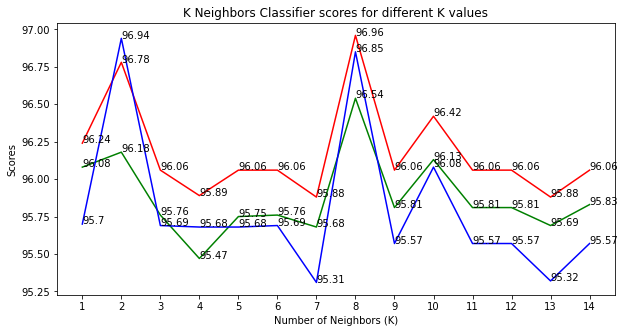

In [130]:
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kas, color = 'red')
plt.plot([k for k in range(1, 15)], kps, color = 'green')
plt.plot([k for k in range(1, 15)], krs, color = 'blue')
# plt.plot([k for k in range(1, 15)], kfs, color = 'black')
for i in range(1,15):
    plt.text(i, kas[i-1], (kas[i-1]))
    plt.text(i, kps[i-1], (kps[i-1]))
    plt.text(i, krs[i-1], (krs[i-1]))
    # plt.text(i, kfs[i-1], (kfs[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

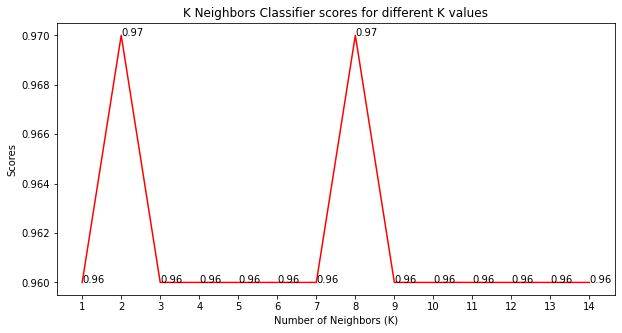

In [121]:
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kas, color = 'red')
for i in range(1,15):
    plt.text(i, kas[i-1], (kas[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier accuracy for different K values')


[link text](https://)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

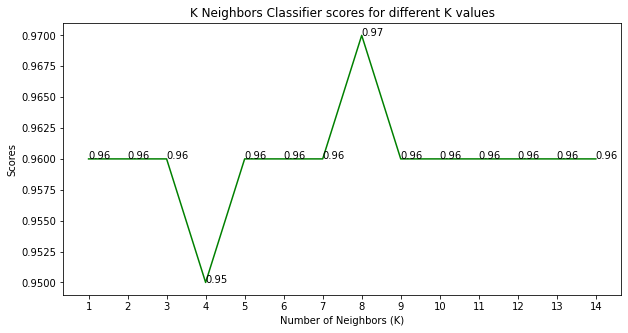

In [124]:
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kps, color = 'green')
for i in range(1,15):
    plt.text(i, kps[i-1], ( kps[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier precision for different K values')

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

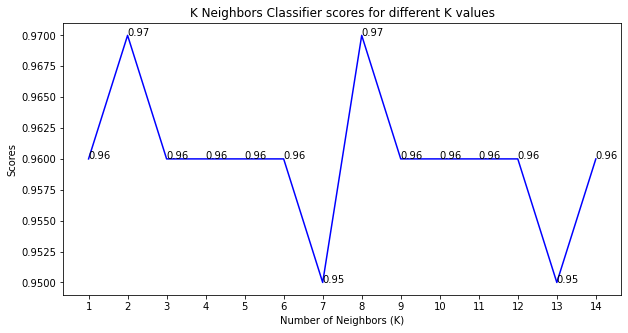

In [125]:
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], krs, color = 'blue')
for i in range(1,15):
    plt.text(i, krs[i-1], (krs[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier Recall for different K values')

Text(0.5, 1.0, 'K Neighbors Classifier F1-score for different K values')

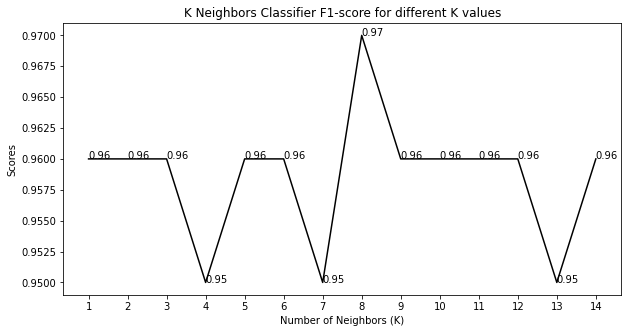

In [129]:
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kfs, color = 'black')
for i in range(1,15):
    plt.text(i, kfs[i-1], (kfs[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier F1-score for different K values')

In [131]:
# import matplotlib.pyplot as plt
# #plt.plot(xx, yy)
# #plt.show()
# #plt.savefig('f3.png')
# from matplotlib.backends.backend_pdf import PdfPages
# with PdfPages(r'f3.pdf') as export_pdf:
#     plt.plot(xx,yy, color='red')
#     plt.title('Graph of RT activation function', fontsize=10)
#     plt.xlabel('Values of x', fontsize=8)
#     plt.ylabel('Values of f(x)', fontsize=8)
#     plt.grid(True)
#     export_pdf.savefig()
#     plt.close()

## **General SVM at 10K-Fold on BCWD**

In [39]:
from sklearn import svm

In [40]:
# from sklearn.model_selection import train_test_split
# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test
# clf = svm.SVC(kernel='linear') # Linear Kernel
# #Train the model using the training sets
# clf.fit(X_train, y_train)
# #Predict the response for test dataset
# y_pred = clf.predict(X_test)
# from sklearn import metrics
# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# from sklearn.model_selection import cross_val_score
# import numpy as np

In [41]:
#create a new SVM model
clf = svm.SVC(kernel='linear')
#train model with cv of 10

accSVM = cross_val_score(clf, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
# print(accSVM)
print("Acuracy:",np.mean(accSVM)*100)
 
preSVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision_macro')
#print each cv score (Precision) and average them
# print(preSVM)
print("Precision:",np.mean(preSVM)*100)

recSVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall_macro')
#print each cv score (Recall) and average them
# print(recSVM)
print("Recall:",np.mean(recSVM)*100)

f1SVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
#print each cv score (F1-Score) and average them
# print(f1SVM)
print("F1:",np.mean(f1SVM))


Acuracy: 96.60389610389612
Precision: 96.16123077965183
Recall: 96.4571676940098
F1: 0.9628082152005861


## **General K-NN with Manhattan Distance at 10K-fold for HDD data**

In [5]:
# Library Declaration  
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
import numpy as np

In [6]:
#Input Data
# df = pd.read_table('reprocessed.hungarian.data', sep=' ', names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]) 
df = pd.read_table('processed.cleveland.data', sep=',', names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]) 


In [7]:
#Checking data
df=df[df.ca != '?']
df=df[df.thal != '?']
df["thal"] = df["thal"].astype(str).astype(float)
df["ca"] = df["ca"].astype(str).astype(float)
# df = df[:-1]
df.info()
print(df)
# df.info()

# df
# # performing linear algebra 
# import numpy as np    
# # data processing 
# import pandas as pd 
# df = pd.read_table('reprocessed.hungarian.data', sep=',', names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]) 
# # df.head(3)
#df = df[:-1]
# print(df)
# df=df[df.ca != '?']
# df=df[df.thal != '?']
# df["thal"] = df["thal"].astype(str).astype(float)
# df["ca"] = df["ca"].astype(str).astype(float)
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
      age  sex   cp  trestbps   chol  ...  oldpeak  slope   ca  thal  num
0    63.0  1.0  1.0     145.0  233.0  ...      2.3    3.0  0.0   6.0    0
1    67.0  1.0  4.0     160.0  286.0  ...      1.5    2.0  3.0   3.0   

In [8]:
#preparing data
X = np.array(df.iloc[:, :13]) 
y = np.array(df['num'])

In [9]:
#preparing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 

In [11]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
#train model with cv of 10

accK = cross_val_score(knn_cv, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
# print(accK)
print("Acuracy:",np.mean(accK)*100)

preK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='precision_macro')
#print each cv score (Precision) and average them
# print(preK)
print("Precision:",np.mean(preK)*100)

recK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='recall_macro')
#print each cv score (Recall) and average them
# print(recK)
print("Recall:",np.mean(recK)*100)

f1K = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='f1_macro')
#print each cv score (F1-Score) and average them
# print(f1K)
print("F1:",np.mean(f1K))

Acuracy: 48.56884057971014
Precision: 18.392154405621902
Recall: 21.953846153846154
F1: 0.19426685418565287


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

## **General SVM at 10K-Fold on HDD**

In [12]:
from sklearn import svm

In [14]:
#create a new SVM model
clf = svm.SVC(kernel='linear')
#train model with cv of 10

accSVM = cross_val_score(clf, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
# print(accSVM)
print("Acuracy:",np.mean(accSVM)*100)
 
preSVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision_macro')
#print each cv score (Precision) and average them
# print(preSVM)
print("Precision:",np.mean(preSVM)*100)

recSVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall_macro')
#print each cv score (Recall) and average them
# print(recSVM)
print("Recall:",np.mean(recSVM)*100)

f1SVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
#print each cv score (F1-Score) and average them
# print(f1SVM)
print("F1:",np.mean(f1SVM))

Acuracy: 56.992753623188406


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

Precision: 30.14546433958199
Recall: 33.57692307692307
F1: 0.30907228684470067


In [49]:
# knn = KNeighborsClassifier(n_neighbors = 9, metric='manhattan')# metric='euclidean') #metric='minkowski') 
# knn.fit(X_train, y_train) 
# from sklearn import metrics 
# from sklearn.metrics import precision_recall_fscore_support
# y_pred=knn.predict(X_test)
# from sklearn import metrics 
# from sklearn.metrics import precision_recall_fscore_support
# acc=(metrics.accuracy_score(y_test,y_pred)*100)
# acc 
# knn.score(X_test, y_test) 
# from sklearn.metrics import precision_score
# pre=(precision_score(y_test,y_pred, average='macro')*100)
# pre
# from sklearn.metrics import recall_score
# rec=(recall_score(y_test,y_pred, average='macro')*100)
# rec 
# from sklearn.metrics import f1_score
# f1=(f1_score(y_test,y_pred, average='macro'))
# f1